In [22]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

In [2]:
from tensorflow.keras.utils import to_categorical  # 분류분석시 원한 인코딩
from tensorflow.keras.models import Sequential   # 모델 생성
from tensorflow.keras.layers import Dense,Input
import numpy as np

# 머신러닝/딥러닝 : 데이터의 법칙성을 추출
- 다양한 분야에서 응용 : 글씨인식, 문장분류,  질병분류, 
※ ML/DL의 종류
 - 지도학습(독립=입력변수와 종속=타겟=출력변수가 모두 주어졌을 경우)
     회귀분석(타겟변수가 연속형) vs분류분석(multi, binary)
- 비지도 학습(입력변수만)
    군집화
- 강화학습

※ 지도학습에서의 ML, DL 프로그래밍 방식
1. 데이터셋 확보(input=입력변수, target=종속변수)
    원본 데이터 및 시뮬레이션을 통해 데이터 생성
2. 전처리
    스케일 조정
    훈렬섹(학습셋), 검증셋, 시험셋(테이스셋)
    학습 및 평가 가능한 포멧으로 변환
3. 모델 구성
    sequential 객체 생성뒤 필요한 층을 add()함수로 추가
4. 모델 학습과정 설정
    compile()함수 이용, 손실함수, optimizer, metrics(평가지표)
5. 모델학습시키기 ( ft. 학습과정 지켜보기)
       fit()함수 이용- 훈련셋입력 = 독입변수, 훈련셋타케스 종속변수, 학습횟수, 검증셋
6. 모델 평가
        시험셋(테스트셋)을 인자로 넣은 evaluate()함수 이용, 그래프
7. 모델 사용
        predict() 이용, 입력데이터는 2차원 데이터 [ [ 0 ] ]
8. 모델 저장
        save()함수를 이용해서 저장. 저장된 모델은 load_model()함수를 이용해서 불러올 수 있음

# 1. 데이터 셋 생성
# 2. 데이터 전처리

In [3]:
# 학습데이터 = 훈련데이터
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])
# 검증데이터 = 시험테스트
x_test = np.array([1,2,3,4,5,6,7,8,9])
y_test = np.array([2,4,6,8,10,12,14,16,18])
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((90,), (9,), (9,), (90,), (9,), (9,))

In [4]:
# 인코딩 종류
data = np.array(['a','b','c','d'])
print('원 데이터 : ',data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# le.fit(data)
# labeled_data = le.transform(data)
labeled_data = le.fit_transform(data)
print('라벨인코딩된 데이터 : ', labeled_data)
one_hot_encoded_data = to_categorical(labeled_data)
print('원 핫 인코딩된 데이터 : ',one_hot_encoded_data)

원 데이터 :  ['a' 'b' 'c' 'd']
라벨인코딩된 데이터 :  [0 1 2 3]
원 핫 인코딩된 데이터 :  [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [5]:
# 분류분석을 하기 위해 target을 원핫인코딩(라벨링 전환)
data = np.array([1,2,2,4,2])
print(data)
categorical_one_hot = to_categorical(data)
print('to_categorical을 이용한 원핫인코딩 :\n', categorical_one_hot)
import pandas as pd
get_dumies_one_hot = pd.get_dummies(data)
display('get_dumies를 이용한 원핫인코딩 : ', get_dumies_one_hot)
print(type(get_dumies_one_hot))


[1 2 2 4 2]
to_categorical을 이용한 원핫인코딩 :
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


'get_dumies를 이용한 원핫인코딩 : '

,1,2,4
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


<class 'pandas.core.frame.DataFrame'>


In [6]:
# 분류분석을 위한 target변수 라벨링 전환(=원핫인코딩)
Y_train = to_categorical(y_train, 19)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

In [7]:
print('훈련셋 구조 : ', x_train.shape, Y_train.shape)#  독립변수 1개, 타겟변수 19개
print('검증셋 구조 : ', x_val.shape, Y_val.shape)
print('테스트셋 구조 : ', x_test.shape, Y_test.shape)

훈련셋 구조 :  (90,) (90, 19)
검증셋 구조 :  (9,) (9, 19)
테스트셋 구조 :  (9,) (9, 19)


# 3. 모델 구성하기

In [6]:
model = Sequential()
model.add(Input(shape=(1,)))  # 입력층
model.add(Dense(units=38, activation='sigmoid'))  # units출력수, 활성화함수: relu, tanh
model.add(Dense(units=64, activation='elu'))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=19, activation='softmax'))
# softmax : 모든 출력결과의 합이 1. 분류분석 마지막 layer(출력층)에서 activation으로
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정 설정

In [9]:
model.compile(loss='categorical_crossentropy',  # 분류분석에서의 손실함수(원핫인코딩有)
              optimizer='sgd',
              metrics=['accuracy'])  # 평가지표 : accuracy

# 5. 모델 학습시키기

In [10]:
hist = model.fit(x_train, Y_train,
                epochs = 300,
                batch_size=10,
                verbose=2,  # 학습결과 출력 옵션 0:출력없음, 1:기본값, 2:에포크별 로그 상세출력
                validation_data=(x_val, Y_val)
                )

Epoch 1/300
9/9 - 1s - loss: 3.1584 - accuracy: 0.0000e+00 - val_loss: 2.9654 - val_accuracy: 0.0000e+00 - 652ms/epoch - 72ms/step
Epoch 2/300
9/9 - 0s - loss: 2.8836 - accuracy: 0.1333 - val_loss: 2.7748 - val_accuracy: 0.2222 - 45ms/epoch - 5ms/step
Epoch 3/300
9/9 - 0s - loss: 2.7296 - accuracy: 0.0778 - val_loss: 2.6544 - val_accuracy: 0.1111 - 47ms/epoch - 5ms/step
Epoch 4/300
9/9 - 0s - loss: 2.6283 - accuracy: 0.1000 - val_loss: 2.5696 - val_accuracy: 0.1111 - 40ms/epoch - 4ms/step
Epoch 5/300
9/9 - 0s - loss: 2.5521 - accuracy: 0.1111 - val_loss: 2.5062 - val_accuracy: 0.1111 - 37ms/epoch - 4ms/step
Epoch 6/300
9/9 - 0s - loss: 2.4973 - accuracy: 0.1111 - val_loss: 2.4554 - val_accuracy: 0.1111 - 43ms/epoch - 5ms/step
Epoch 7/300
9/9 - 0s - loss: 2.4494 - accuracy: 0.1889 - val_loss: 2.4128 - val_accuracy: 0.1111 - 38ms/epoch - 4ms/step
Epoch 8/300
9/9 - 0s - loss: 2.4118 - accuracy: 0.1222 - val_loss: 2.3761 - val_accuracy: 0.2222 - 34ms/epoch - 4ms/step
Epoch 9/300
9/9 - 0s -

Epoch 69/300
9/9 - 0s - loss: 1.5398 - accuracy: 0.3889 - val_loss: 1.5119 - val_accuracy: 0.4444 - 39ms/epoch - 4ms/step
Epoch 70/300
9/9 - 0s - loss: 1.5272 - accuracy: 0.3778 - val_loss: 1.5015 - val_accuracy: 0.4444 - 36ms/epoch - 4ms/step
Epoch 71/300
9/9 - 0s - loss: 1.5130 - accuracy: 0.4222 - val_loss: 1.4905 - val_accuracy: 0.5556 - 37ms/epoch - 4ms/step
Epoch 72/300
9/9 - 0s - loss: 1.5085 - accuracy: 0.3889 - val_loss: 1.4812 - val_accuracy: 0.5556 - 34ms/epoch - 4ms/step
Epoch 73/300
9/9 - 0s - loss: 1.5109 - accuracy: 0.4111 - val_loss: 1.4685 - val_accuracy: 0.4444 - 42ms/epoch - 5ms/step
Epoch 74/300
9/9 - 0s - loss: 1.4850 - accuracy: 0.4556 - val_loss: 1.4584 - val_accuracy: 0.5556 - 39ms/epoch - 4ms/step
Epoch 75/300
9/9 - 0s - loss: 1.4730 - accuracy: 0.4778 - val_loss: 1.4488 - val_accuracy: 0.5556 - 38ms/epoch - 4ms/step
Epoch 76/300
9/9 - 0s - loss: 1.4653 - accuracy: 0.4889 - val_loss: 1.4381 - val_accuracy: 0.5556 - 40ms/epoch - 4ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 1.0282 - accuracy: 0.8333 - val_loss: 1.0085 - val_accuracy: 0.8889 - 40ms/epoch - 4ms/step
Epoch 137/300
9/9 - 0s - loss: 1.0328 - accuracy: 0.8333 - val_loss: 1.0050 - val_accuracy: 0.8889 - 41ms/epoch - 5ms/step
Epoch 138/300
9/9 - 0s - loss: 1.0312 - accuracy: 0.8000 - val_loss: 1.0022 - val_accuracy: 0.8889 - 41ms/epoch - 5ms/step
Epoch 139/300
9/9 - 0s - loss: 1.0219 - accuracy: 0.8111 - val_loss: 0.9962 - val_accuracy: 0.7778 - 37ms/epoch - 4ms/step
Epoch 140/300
9/9 - 0s - loss: 1.0192 - accuracy: 0.8000 - val_loss: 0.9874 - val_accuracy: 0.7778 - 40ms/epoch - 4ms/step
Epoch 141/300
9/9 - 0s - loss: 1.0147 - accuracy: 0.7667 - val_loss: 0.9962 - val_accuracy: 0.7778 - 42ms/epoch - 5ms/step
Epoch 142/300
9/9 - 0s - loss: 1.0130 - accuracy: 0.7889 - val_loss: 0.9826 - val_accuracy: 0.7778 - 38ms/epoch - 4ms/step
Epoch 143/300
9/9 - 0s - loss: 1.0142 - accuracy: 0.7778 - val_loss: 0.9725 - val_accuracy: 0.8889 - 41ms/epoch - 5ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.7462 - accuracy: 0.9000 - val_loss: 0.7211 - val_accuracy: 1.0000 - 48ms/epoch - 5ms/step
Epoch 204/300
9/9 - 0s - loss: 0.7389 - accuracy: 0.9111 - val_loss: 0.7149 - val_accuracy: 1.0000 - 44ms/epoch - 5ms/step
Epoch 205/300
9/9 - 0s - loss: 0.7512 - accuracy: 0.8556 - val_loss: 0.7198 - val_accuracy: 0.8889 - 45ms/epoch - 5ms/step
Epoch 206/300
9/9 - 0s - loss: 0.7657 - accuracy: 0.8889 - val_loss: 0.7154 - val_accuracy: 0.8889 - 45ms/epoch - 5ms/step
Epoch 207/300
9/9 - 0s - loss: 0.7431 - accuracy: 0.8667 - val_loss: 0.7170 - val_accuracy: 0.7778 - 44ms/epoch - 5ms/step
Epoch 208/300
9/9 - 0s - loss: 0.7629 - accuracy: 0.8000 - val_loss: 0.7182 - val_accuracy: 0.7778 - 43ms/epoch - 5ms/step
Epoch 209/300
9/9 - 0s - loss: 0.7469 - accuracy: 0.8333 - val_loss: 0.6940 - val_accuracy: 1.0000 - 45ms/epoch - 5ms/step
Epoch 210/300
9/9 - 0s - loss: 0.7174 - accuracy: 0.9333 - val_loss: 0.6927 - val_accuracy: 1.0000 - 44ms/epoch - 5ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.5349 - accuracy: 0.9778 - val_loss: 0.5114 - val_accuracy: 1.0000 - 40ms/epoch - 4ms/step
Epoch 271/300
9/9 - 0s - loss: 0.5680 - accuracy: 0.9111 - val_loss: 0.5151 - val_accuracy: 0.8889 - 44ms/epoch - 5ms/step
Epoch 272/300
9/9 - 0s - loss: 0.5154 - accuracy: 0.9778 - val_loss: 0.5234 - val_accuracy: 0.8889 - 42ms/epoch - 5ms/step
Epoch 273/300
9/9 - 0s - loss: 0.5372 - accuracy: 0.9667 - val_loss: 0.4994 - val_accuracy: 1.0000 - 43ms/epoch - 5ms/step
Epoch 274/300
9/9 - 0s - loss: 0.5487 - accuracy: 0.9444 - val_loss: 0.5189 - val_accuracy: 1.0000 - 48ms/epoch - 5ms/step
Epoch 275/300
9/9 - 0s - loss: 0.5216 - accuracy: 0.9889 - val_loss: 0.5118 - val_accuracy: 0.8889 - 48ms/epoch - 5ms/step
Epoch 276/300
9/9 - 0s - loss: 0.5354 - accuracy: 0.9333 - val_loss: 0.5000 - val_accuracy: 1.0000 - 45ms/epoch - 5ms/step
Epoch 277/300
9/9 - 0s - loss: 0.5172 - accuracy: 0.9333 - val_loss: 0.4876 - val_accuracy: 1.0000 - 45ms/epoch - 5ms/step
Epoch 278/300
9/

# 6. 모델 평가하기(모델학습과정 살펴보고, evalute()

In [12]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

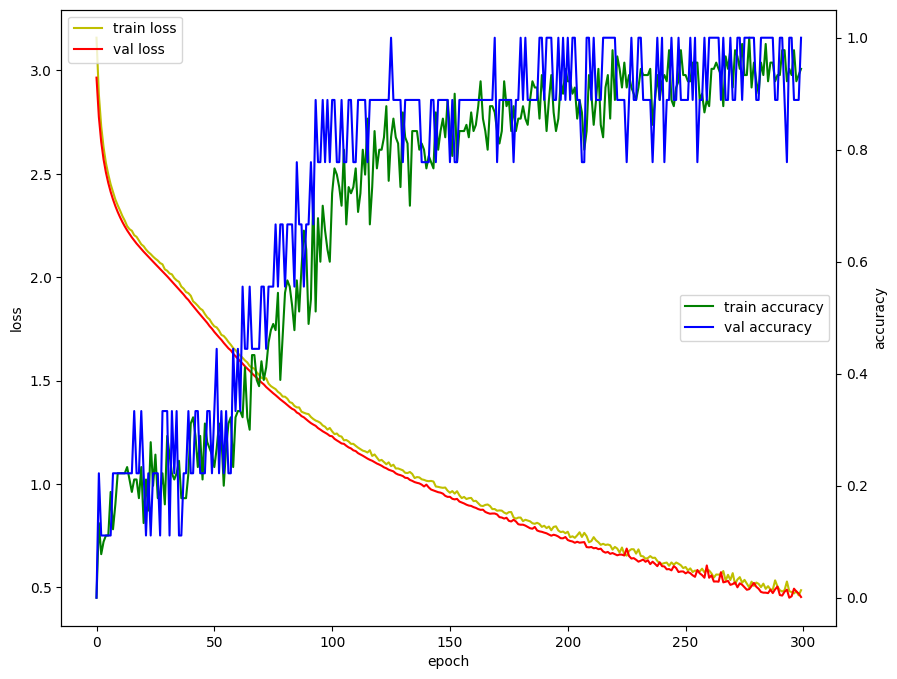

In [20]:
# 모델 학습과정 시각화
import matplotlib.pylab as plt
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()  # loss_ax와 x축을 공유하는 axx_ax생성
acc_ax.plot(hist.history['accuracy'],'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [21]:
# 모델 평가
score = model.evaluate(x_test,Y_test,batch_size=1)

9/9 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 1.0000


In [22]:
score  # loss, accuracy

[0.45256879925727844, 1.0]

In [23]:
print('평가된 loss : ', score[0])
print('평가된 accuracy : ', score[1]*100, '%')

평가된 loss :  0.45256879925727844
평가된 accuracy :  100.0 %


# 7. 모델 사용하기 

In [26]:
H = model.predict(np.array( [ [2] ] ))
H

1/1 [==============================] - 0s 22ms/step


array([[4.1802149e-13, 8.1467151e-12, 1.0575595e-01, 4.3469250e-10,
        7.4570751e-01, 9.2848621e-14, 1.4669770e-01, 2.2721344e-11,
        1.8371276e-03, 1.0632653e-12, 1.7035100e-06, 1.2912737e-12,
        5.8065969e-10, 4.9421437e-13, 4.4044771e-14, 8.7002645e-12,
        2.0720793e-19, 1.7064549e-13, 4.4576927e-27]], dtype=float32)

In [27]:
# 분류분석의 예측은 predict()후 argmax()
model.predict(np.array( [ [2] ] )).argmax()

1/1 [==============================] - 0s 30ms/step


4

In [28]:
# 4를 몇 % 확률로 예측했는지
H[0, H.argmax()]*100

74.57075119018555

# 7. 모델 저장하기

In [30]:
# model.save('model/02_deep.h5')
from tensorflow.keras.models import save_model
save_model(model, 'model/02_deep.h5')

# 저장된 모델 사용하기

In [8]:
from tensorflow.keras.models import load_model
model2 = load_model('model/02_deep.h5')

In [9]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


In [15]:
data = np.array([[2], 
                [3]])
predictions = model2.predict(data)
predictions.argmax(axis=-1)

1/1 [==============================] - 0s 56ms/step


array([4, 6], dtype=int64)

In [16]:
def predict_classes(model, data):
    predictions = model.predict(data)
    return predictions.argmax(axis=1)

In [19]:
import tensorflow as tf
@tf.function(reduce_retracing=True)
def predict_classes(modle, data):
    predictions = model(data, training=False)
    return tf.argmax(predictions, axis=-1)

In [20]:
import numpy as np
input_data = int(input('어떤 데이터를 예측할까요?'))
data = np.array([[input_data]])
print('예측된 분류는 : ',predict_classes(model2,data))

어떤 데이터를 예측할까요?2
예측된 분류는 :  tf.Tensor([15], shape=(1,), dtype=int64)
